In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer , KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix,ConfusionMatrixDisplay, mean_squared_error, r2_score
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import Ridge



In [ ]:
df=pd.read_excel("finale.xlsx")

In [ ]:
df.shape

(1594, 20)

In [ ]:
df.columns

Index(['Location', 'State', 'Min_Temperature', 'Max_Temperature',
       'Min_Dissolved_Oxygen', 'Max_Dissolved_Oxygen', 'Min_pH', 'Max_pH',
       'Min_Conductivity', 'Max_Conductivity', 'Min_BOD', 'Max_BOD',
       'Min_Nitrate', 'Max_Nitrate', 'Min_Fecal_Coliform', 'Max_Fecal',
       'Min_Coliform', 'Max_Coliform', 'Min_Fecal_Streptococci',
       'Max_Fecal_Streptococci'],
      dtype='object')

# data cleaning

In [ ]:
df.isnull().sum()

,0
Location,2
State,2
Min_Temperature,37
Max_Temperature,37
Min_Dissolved_Oxygen,3
Max_Dissolved_Oxygen,3
Min_pH,2
Max_pH,2
Min_Conductivity,58
Max_Conductivity,58


In [ ]:
df.describe()

,Min_Temperature,Max_Temperature,Min_Dissolved_Oxygen,Max_Dissolved_Oxygen,Min_pH,Max_pH,Min_Conductivity,Max_Conductivity,Min_BOD,Max_BOD,Min_Nitrate,Max_Nitrate,Min_Fecal_Coliform,Max_Fecal,Min_Coliform,Max_Coliform,Min_Fecal_Streptococci,Max_Fecal_Streptococci
count,1557.000000,1557.000000,1591.000000,1591.000000,1592.000000,1592.000000,1536.000000,1536.000000,1592.000000,1592.000000,1592.000000,1592.000000,1.399000e+03,1.399000e+03,1.414000e+03,1.414000e+03,842.000000,8.420000e+02
mean,18.581053,27.788568,5.783030,7.878504,7.190653,8.077814,309.706380,1269.023438,2.333982,5.773178,0.737864,4.445345,4.065553e+03,7.205606e+04,6.828426e+03,3.740309e+05,116.990261,4.243118e+03
std,5.497597,5.416634,1.970267,1.905012,0.593401,0.547651,946.333671,4324.777497,4.039051,13.693784,2.162305,24.732164,6.052689e+04,8.069028e+05,8.872501e+04,5.316378e+06,771.323791,8.498869e+04
min,2.000000,4.000000,0.300000,0.300000,2.000000,3.000000,5.000000,31.000000,1.000000,1.000000,0.000000,0.000000,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.800000,2.000000e+00
25%,15.000000,24.300000,5.100000,7.000000,7.000000,7.800000,128.000000,280.000000,1.000000,1.900000,0.300000,0.530000,2.000000e+00,2.700000e+01,3.600000e+01,1.700000e+02,2.000000,2.000000e+00
50%,19.000000,29.000000,6.200000,7.900000,7.200000,8.200000,210.000000,474.000000,1.200000,2.600000,0.320000,1.340000,2.600000e+01,2.100000e+02,2.100000e+02,1.400000e+03,2.000000,8.000000e+00
75%,22.000000,31.500000,7.000000,9.000000,7.500000,8.400000,328.000000,822.500000,2.100000,3.800000,0.600000,3.065000,3.500000e+02,2.300000e+03,1.100000e+03,4.900000e+03,17.000000,2.375000e+02
max,29.000000,39.000000,11.400000,14.100000,9.000000,9.900000,34400.000000,54200.000000,48.000000,294.000000,32.000000,790.020000,2.200000e+06,2.400000e+07,3.200000e+06,1.600000e+08,17000.000000,2.400000e+06


In [ ]:
missing_percent = df.isnull().mean() * 100
missing_summary = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing %': missing_percent.round(2)
})
missing_summary.sort_values(by='Missing %', ascending=False)


,Missing Values,Missing %
Min_Fecal_Streptococci,752,47.18
Max_Fecal_Streptococci,752,47.18
Max_Fecal,195,12.23
Min_Fecal_Coliform,195,12.23
Min_Coliform,180,11.29
Max_Coliform,180,11.29
Max_Conductivity,58,3.64
Min_Conductivity,58,3.64
Min_Temperature,37,2.32
Max_Temperature,37,2.32


In [ ]:
df = df.dropna(subset=["Location", "State"])

In [ ]:
# Use median imputation for numeric columns (<20% missing)
num_cols = [
    'Max_Fecal', 'Min_Fecal_Coliform', 'Max_Coliform', 'Min_Coliform',
    'Max_Conductivity', 'Min_Conductivity',
    'Max_Temperature', 'Min_Temperature',
    'Max_Dissolved_Oxygen', 'Min_Dissolved_Oxygen',
    'Max_pH', 'Min_pH',
    'Max_BOD', 'Min_BOD',
    'Max_Nitrate', 'Min_Nitrate'
]


imputer = SimpleImputer(strategy='median')


df[num_cols] = imputer.fit_transform(df[num_cols])

In [ ]:
print("Remaining missing values:", df[num_cols].isnull().sum().sum())

Remaining missing values: 0


In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)

knn_cols = [
    'Min_Fecal_Streptococci','Max_Fecal_Streptococci',

]

df[knn_cols] = knn_imputer.fit_transform(df[knn_cols])

In [ ]:
df.head(40)

,Location,State,Min_Temperature,Max_Temperature,Min_Dissolved_Oxygen,Max_Dissolved_Oxygen,Min_pH,Max_pH,Min_Conductivity,Max_Conductivity,Min_BOD,Max_BOD,Min_Nitrate,Max_Nitrate,Min_Fecal_Coliform,Max_Fecal,Min_Coliform,Max_Coliform,Min_Fecal_Streptococci,Max_Fecal_Streptococci
0,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,2.0,24.0,7.8,9.2,7.2,8.2,68.0,380.0,1.0,2.8,0.32,1.15,2.0,170.0,63.0,540.0,2.000000,2.000000
1,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,2.0,13.0,7.6,9.0,6.5,8.1,58.0,135.0,1.0,2.8,0.32,1.87,110.0,1600.0,920.0,1600.0,2.000000,2.000000
2,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,2.0,13.0,7.8,8.8,6.7,7.8,62.0,113.0,1.0,2.8,0.32,1.08,110.0,1600.0,350.0,1600.0,2.000000,2.000000
3,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,2.0,14.0,7.9,8.9,6.3,8.0,52.0,137.0,1.0,1.0,0.32,1.74,22.0,110.0,79.0,540.0,2.000000,2.000000
4,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,2.0,13.0,7.8,9.1,7.0,7.8,51.0,113.0,1.0,1.0,0.32,0.97,23.0,120.0,110.0,430.0,2.000000,2.000000
5,"RIVER BEAS, U/S KULLU",HIMACHAL PRADESH,4.0,16.0,7.6,8.7,6.7,7.8,44.0,128.0,1.0,1.0,0.32,0.90,49.0,220.0,240.0,920.0,2.000000,2.000000
6,RIVER BEAS D/S OF WASTE PROCESSING FACILITY A...,HIMACHAL PRADESH,4.0,16.0,7.6,8.4,6.6,7.7,73.0,170.0,1.0,1.6,0.32,0.96,47.0,150.0,280.0,920.0,2.000000,2.000000
7,RIVER BEAS D/S KULLU,HIMACHAL PRADESH,4.0,16.0,7.5,8.4,7.2,8.0,77.0,144.0,1.0,1.6,0.32,2.65,110.0,540.0,540.0,1600.0,2.000000,2.000000
8,RIVER BEAS D/S AUT,HIMACHAL PRADESH,5.0,16.0,7.5,8.1,7.2,8.2,61.0,129.0,1.0,1.0,0.32,0.77,34.0,280.0,170.0,1600.0,2.000000,2.000000
9,RIVER BEAS AT PANDOH DAM,HIMACHAL PRADESH,9.0,26.0,8.3,9.0,7.1,8.3,65.0,205.0,1.0,1.0,0.32,1.06,22.0,79.0,70.0,430.0,2.000000,2.000000


In [ ]:
# confirm imputation worked well
print(df.isnull().sum().sum())


for min_col, max_col in [('Min_Temperature','Max_Temperature'),
                         ('Min_pH','Max_pH'),
                         ('Min_Dissolved_Oxygen','Max_Dissolved_Oxygen'),
                         ('Min_Coliform','Max_Coliform')]:
    inconsistent = (df[min_col] > df[max_col]).sum()
    print(f"{min_col} > {max_col}: {inconsistent} rows")


0
Min_Temperature > Max_Temperature: 0 rows
Min_pH > Max_pH: 0 rows
Min_Dissolved_Oxygen > Max_Dissolved_Oxygen: 0 rows
Min_Coliform > Max_Coliform: 0 rows


In [ ]:

standards = {
    'pH': {'Si': 8.5, 'Vi': 7.0},
    'Dissolved_Oxygen': {'Si': 7, 'Vi': 14.0},
    'BOD': {'Si': 5.0, 'Vi': 0},
    'Nitrate': {'Si': 45.0, 'Vi': 0},
    'Conductivity': {'Si': 1500.0, 'Vi': 0},
    'Fecal_Coliform': {'Si': 500.0, 'Vi': 0}
}

In [ ]:
k = 1 / sum(1/v['Si'] for v in standards.values())
weights = {p: k/v['Si'] for p, v in standards.items()}
print("k =", round(k,4))
print(weights)

k = 2.0602
{'pH': 0.24237481148625772, 'Dissolved_Oxygen': 0.2943122710904558, 'BOD': 0.4120371795266381, 'Nitrate': 0.04578190883629312, 'Conductivity': 0.0013734572650887938, 'Fecal_Coliform': 0.004120371795266381}


In [ ]:
def calculate_qi(row):
    q = {}
    q['pH'] = ((row['Max_pH'] - 7.0) / (8.5 - 7.0)) * 100

    # Reverse scaling for DO higher is better
    q['Dissolved_Oxygen'] = ((14.0 - row['Min_Dissolved_Oxygen']) / (14.0 - 7.0)) * 100

    q['BOD'] = ((row['Max_BOD'] - 0) / (5 - 0)) * 100
    q['Nitrate'] = ((row['Max_Nitrate'] - 0) / (45 - 0)) * 100
    q['Conductivity'] = ((row['Max_Conductivity'] - 0) / (1500 - 0)) * 100
    q['Fecal_Coliform'] = ((row['Max_Fecal'] - 0) / (500 - 0)) * 100
    return q


In [ ]:
print(calculate_qi(df.iloc[0]))

{'pH': np.float64(79.99999999999994), 'Dissolved_Oxygen': np.float64(88.57142857142858), 'BOD': np.float64(55.99999999999999), 'Nitrate': np.float64(2.5555555555555554), 'Conductivity': np.float64(25.333333333333336), 'Fecal_Coliform': np.float64(34.0)}


In [ ]:
def calculate_wqi(row):
    q = calculate_qi(row)
    for p in q:
        q[p] = min(100, q[p])
    WQI = sum(q[p] * weights[p] for p in q) / sum(weights.values())
    return WQI



In [ ]:
df['WQI'] = df.apply(calculate_wqi, axis=1)

In [ ]:
def label_quality(wqi):

    if wqi > 100:
        return 'Unsuitable for Drinking'
    elif wqi > 75:
        return 'Very Poor'
    elif wqi > 50:
        return 'Poor'
    elif wqi > 25:
        return 'Good'
    else:
        return 'Excellent'

df['Water_Quality'] = df['WQI'].apply(label_quality)

In [ ]:
df[['Location', 'State', 'WQI', 'Water_Quality']]

,Location,State,WQI,Water_Quality
0,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,68.823610,Poor
1,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,68.371433,Poor
2,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,62.600657,Poor
3,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,50.326492,Poor
4,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,47.442980,Good
...,...,...,...,...
1589,RIVER BUDHABALANGA AT BALASORE U/S,ODISHA,73.981093,Poor
1590,"RIVER SONO AT KANAKDURGA ROAD NEAR REMUNA, HAT...",ODISHA,69.048347,Poor
1591,RIVER TAPTI AT NEPA NAGAR 100 METRE D/S AFTER ...,MADHYA PRADESH,68.700537,Poor
1592,"RIVER HARMU NEAR HARMU BRIDGE, HARMU, RANCHI",JHARKHAND,64.388074,Poor


In [ ]:
df[df["Water_Quality"] == "Unsuitable for Drinking"]

,Location,State,Min_Temperature,Max_Temperature,Min_Dissolved_Oxygen,Max_Dissolved_Oxygen,Min_pH,Max_pH,Min_Conductivity,Max_Conductivity,...,Min_Nitrate,Max_Nitrate,Min_Fecal_Coliform,Max_Fecal,Min_Coliform,Max_Coliform,Min_Fecal_Streptococci,Max_Fecal_Streptococci,WQI,Water_Quality


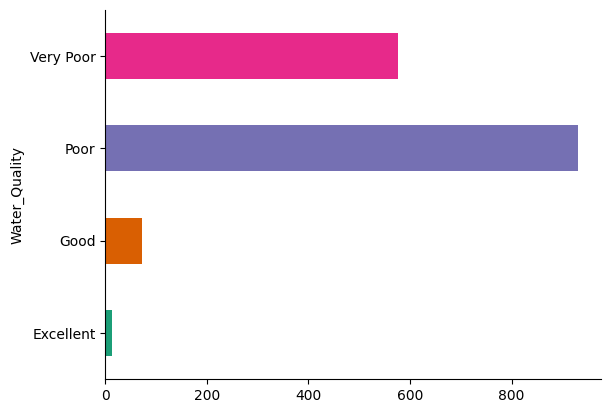

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Water_Quality').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# data visualization

In [ ]:

def plot_compatibility(df, col_x, col_y):


    corr = df[col_x].corr(df[col_y])


    if abs(corr) >= 0.8:
        strength = "Very Strong"
    elif abs(corr) >= 0.6:
        strength = "Strong"
    elif abs(corr) >= 0.4:
        strength = "Moderate"
    elif abs(corr) >= 0.2:
        strength = "Weak"
    else:
        strength = "Very Weak or None"


    print(f"🔹 Correlation between '{col_x}' and '{col_y}': {corr:.3f} ({strength} relationship)")

    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df, x=col_x, y=col_y, color='steelblue', edgecolor='white', s=80)
    plt.title(f"Scatter Plot: {col_x} vs {col_y}\nCorrelation = {corr:.2f} ({strength})", fontsize=13)
    plt.xlabel(col_x)
    plt.ylabel(col_y)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


🔹 Correlation between 'Max_BOD' and 'Min_Dissolved_Oxygen': -0.484 (Moderate relationship)


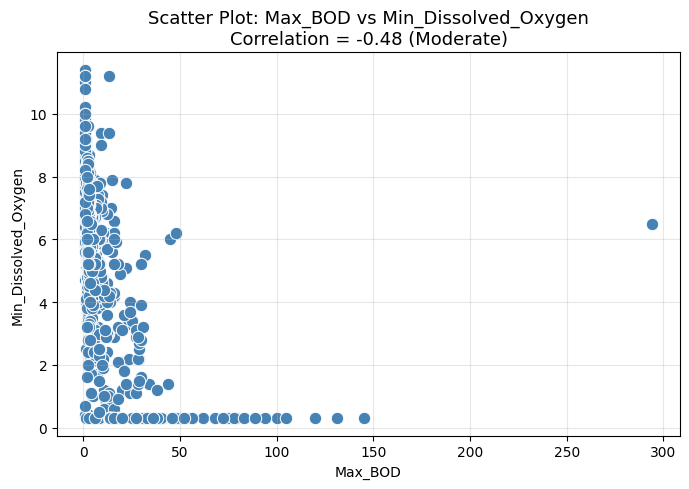

🔹 Correlation between 'Max_Coliform' and 'Max_Fecal': 0.873 (Very Strong relationship)


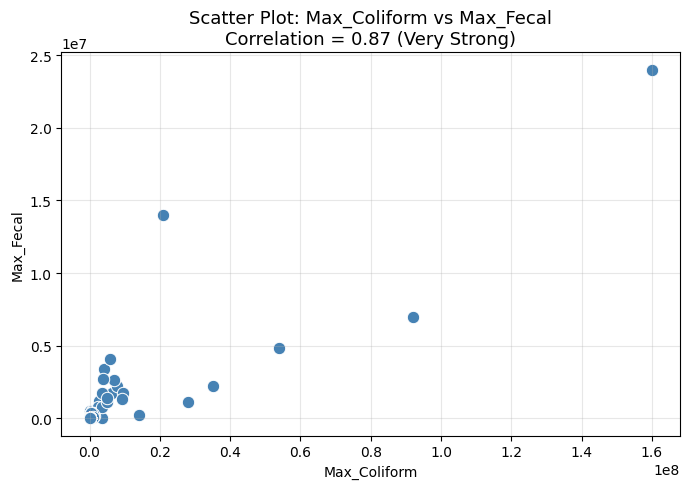

🔹 Correlation between 'Min_pH' and 'Max_pH': 0.660 (Strong relationship)


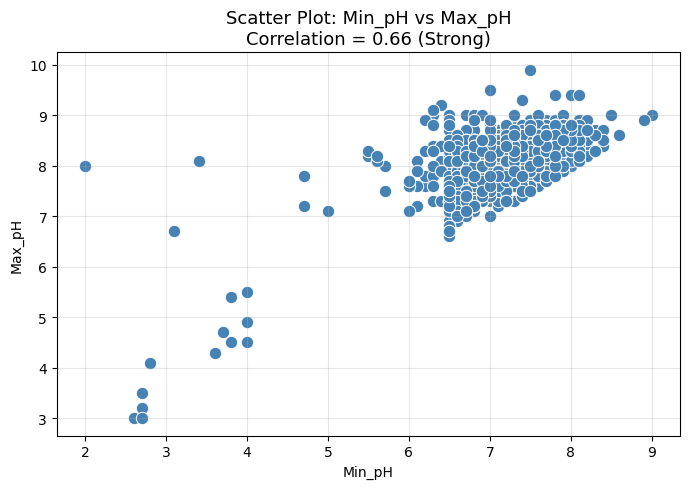

In [ ]:
plot_compatibility(df, 'Max_BOD', 'Min_Dissolved_Oxygen')
plot_compatibility(df, 'Max_Coliform', 'Max_Fecal')
plot_compatibility(df, 'Min_pH', 'Max_pH')

In [ ]:

def plot_skewness(df):


    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    skew_values = numeric_df.skew().sort_values(ascending=False)


    print("Skewness of Numeric Columns:")
    print(skew_values)


    plt.figure(figsize=(10, 6))
    sns.barplot(x=skew_values.values, y=skew_values.index, palette='coolwarm')
    plt.title('Skewness of Numeric Columns', fontsize=14, fontweight='bold', pad=12)
    plt.xlabel('Skewness Value')
    plt.ylabel('Column Name')
    plt.axvline(0, color='black', linewidth=1)
    plt.tight_layout()
    plt.show()

    # Interpretation note
    print("\nInterpretation:")
    print(" Skewness > 0: Right-skewed (long tail on the right)")
    print(" Skewness < 0: Left-skewed (long tail on the left)")
    print("Skewness ≈ 0: Nearly symmetric distribution")


Skewness of Numeric Columns:
Max_Fecal_Streptococci    37.101061
Min_Fecal_Coliform        36.618796
Min_Coliform              35.330330
Min_Conductivity          31.700393
Max_Coliform              25.362130
Max_Fecal                 24.747338
Max_Nitrate               23.857067
Min_Fecal_Streptococci    20.992187
Max_BOD                    9.589164
Min_Nitrate                8.952377
Max_Conductivity           8.429594
Min_BOD                    6.936979
Min_Temperature           -0.653746
WQI                       -0.758616
Max_Dissolved_Oxygen      -0.847109
Max_Temperature           -0.965236
Min_Dissolved_Oxygen      -1.130749
Min_pH                    -3.095112
Max_pH                    -3.242442
dtype: float64


/tmp/ipython-input-3313709140.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_values.values, y=skew_values.index, palette='coolwarm')


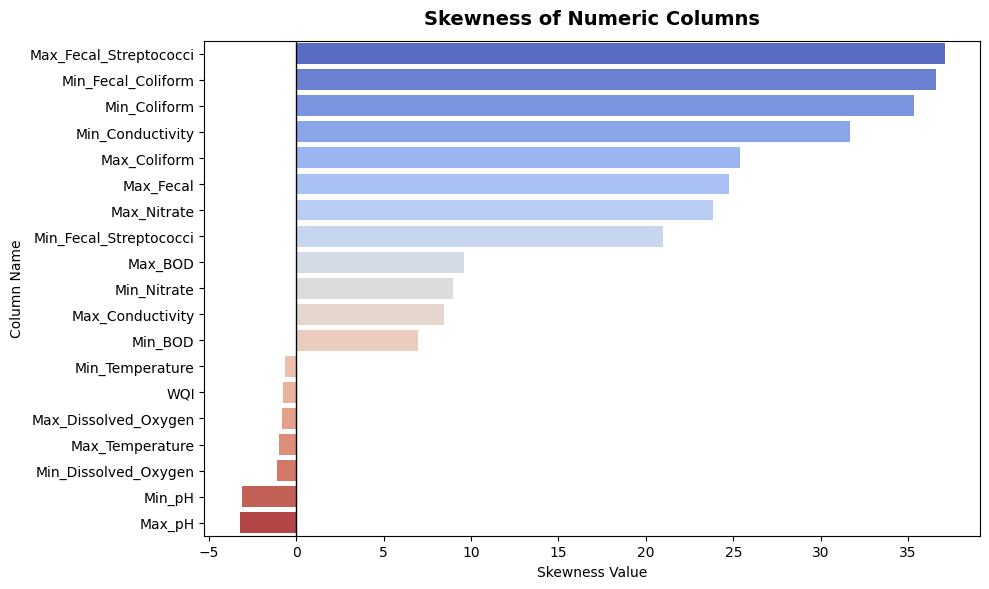


Interpretation:
 Skewness > 0: Right-skewed (long tail on the right)
 Skewness < 0: Left-skewed (long tail on the left)
Skewness ≈ 0: Nearly symmetric distribution


In [ ]:

plot_skewness(df)

In [ ]:
def plot_all_boxplots(df):

    numeric_df = df.select_dtypes(include=['float64', 'int64'])

    # Set up the figure
    num_cols = len(numeric_df.columns)
    plt.figure(figsize=(15, num_cols * 0.6))

    for i, col in enumerate(numeric_df.columns, 1):
        plt.subplot(num_cols, 1, i)
        sns.boxplot(x=numeric_df[col], color='skyblue')
        plt.title(col, fontsize=10, loc='left')
        plt.xlabel('')

    plt.tight_layout()
    plt.suptitle('Box Plots of Numeric Columns', fontsize=14, fontweight='bold', y=1.02)
    plt.show()


/tmp/ipython-input-1290689367.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


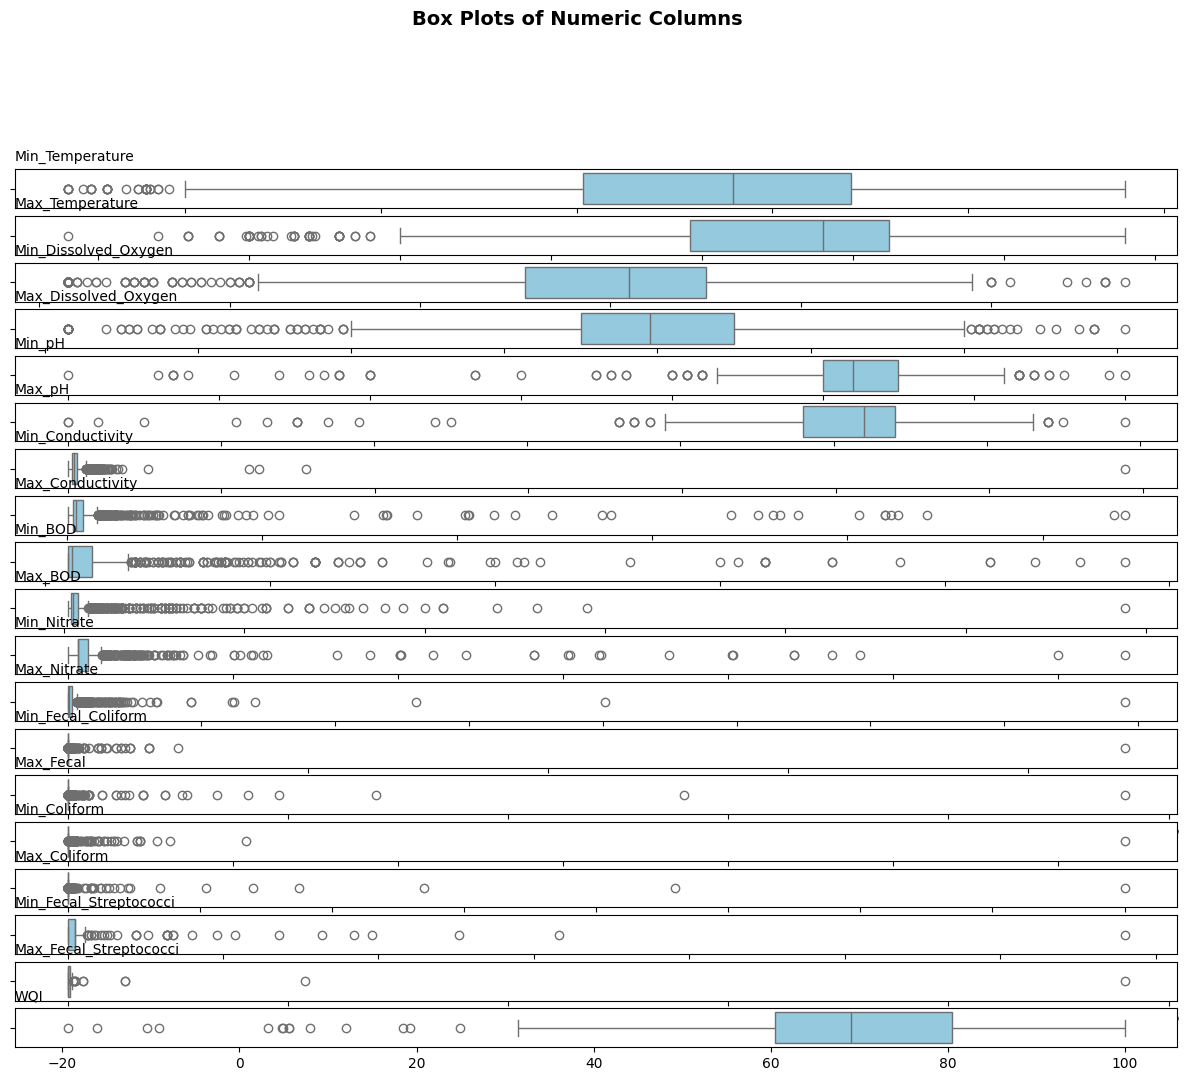

In [ ]:
plot_all_boxplots(df)

In [ ]:
# Simplify duplicates

df['DO'] = (df['Min_Dissolved_Oxygen'] + df['Max_Dissolved_Oxygen']) / 2
df['BOD'] = df['Max_BOD']
df['pH'] = df['Max_pH']
df['Conductivity'] = df['Max_Conductivity']
df['Nitrate'] = df['Max_Nitrate']
df['Fecal'] = df['Max_Fecal']
df['Fecal_Coli'] = df['Max_Fecal']
df['Total_Coli'] = df['Max_Coliform']
df['Fecal_Strept'] = df['Max_Fecal_Streptococci']

In [ ]:


def remove_outliers_iqr(data_frame):

    df_clean_local = data_frame.copy()

    for col in df_clean_local.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_clean_local[col].quantile(0.25)
        Q3 = df_clean_local[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR


        df_clean_local[col] = np.where(df_clean_local[col] < lower, lower,
                                       np.where(df_clean_local[col] > upper, upper, df_clean_local[col]))
    return df_clean_local


df_transformed = df.copy()

# Skewness Transformations
for col in df_transformed.select_dtypes(include=['float64', 'int64']).columns:
    skew = df_transformed[col].skew()
    if skew > 1:         # right-skewed
        df_transformed[col] = np.log1p(df_transformed[col])
    elif skew < -1:      # left-skewed

        max_val = df_transformed[col].max()
        if (max_val + 1 - df_transformed[col] >= 0).all():
            df_transformed[col] = np.sqrt(max_val + 1 - df_transformed[col])


df_clean = remove_outliers_iqr(df_transformed)



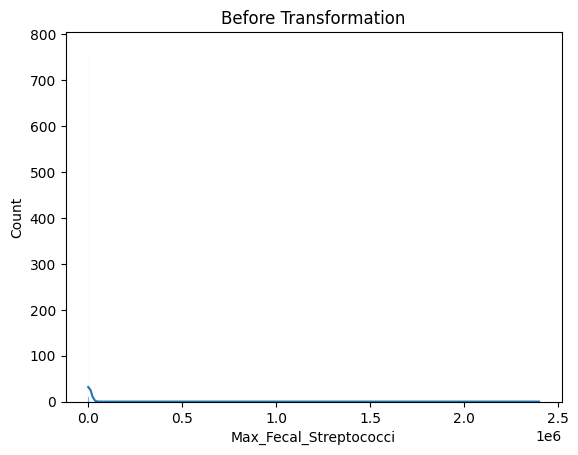

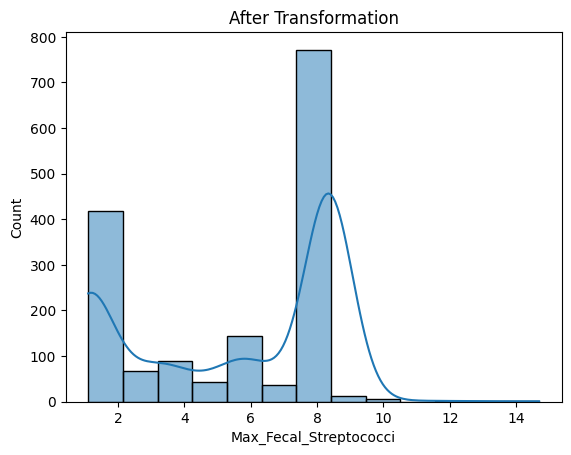

In [ ]:
#before
sns.histplot(df['Max_Fecal_Streptococci'], kde=True)
plt.title('Before Transformation'); plt.show()

# after
sns.histplot(df_clean['Max_Fecal_Streptococci'], kde=True)
plt.title('After Transformation'); plt.show()

In [ ]:
df_clean.columns

Index(['Location', 'State', 'Min_Temperature', 'Max_Temperature',
       'Min_Dissolved_Oxygen', 'Max_Dissolved_Oxygen', 'Min_pH', 'Max_pH',
       'Min_Conductivity', 'Max_Conductivity', 'Min_BOD', 'Max_BOD',
       'Min_Nitrate', 'Max_Nitrate', 'Min_Fecal_Coliform', 'Max_Fecal',
       'Min_Coliform', 'Max_Coliform', 'Min_Fecal_Streptococci',
       'Max_Fecal_Streptococci', 'WQI', 'Water_Quality', 'DO', 'BOD', 'pH',
       'Conductivity', 'Nitrate', 'Fecal', 'Fecal_Coli', 'Total_Coli',
       'Fecal_Strept'],
      dtype='object')

In [ ]:
columns_to_drop = [
    'Min_Temperature', 'Max_Temperature', 'Min_Dissolved_Oxygen',
    'Max_Dissolved_Oxygen', 'Min_pH', 'Max_pH', 'Min_Conductivity',
    'Max_Conductivity', 'Min_BOD', 'Max_BOD', 'Min_Nitrate',
    'Max_Nitrate', 'Min_Fecal_Coliform', 'Max_Fecal',
    'Min_Coliform', 'Max_Coliform', 'Min_Fecal_Streptococci',
    'Max_Fecal_Streptococci'
]

df_clean = df.drop(columns=columns_to_drop, errors='ignore')


In [ ]:

df_clean

,Location,State,WQI,Water_Quality,DO,BOD,pH,Conductivity,Nitrate,Fecal,Fecal_Coli,Total_Coli,Fecal_Strept
0,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,68.823610,Poor,8.50,2.8,8.2,380.0,1.15,170.0,170.0,540.0,2.000000
1,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,68.371433,Poor,8.30,2.8,8.1,135.0,1.87,1600.0,1600.0,1600.0,2.000000
2,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,62.600657,Poor,8.30,2.8,7.8,113.0,1.08,1600.0,1600.0,1600.0,2.000000
3,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,50.326492,Poor,8.40,1.0,8.0,137.0,1.74,110.0,110.0,540.0,2.000000
4,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,47.442980,Good,8.45,1.0,7.8,113.0,0.97,120.0,120.0,430.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,RIVER BUDHABALANGA AT BALASORE U/S,ODISHA,73.981093,Poor,7.60,2.4,8.5,383.0,0.86,2300.0,2300.0,4900.0,4243.117577
1590,"RIVER SONO AT KANAKDURGA ROAD NEAR REMUNA, HAT...",ODISHA,69.048347,Poor,6.40,1.8,8.5,433.0,0.93,13000.0,13000.0,35000.0,4243.117577
1591,RIVER TAPTI AT NEPA NAGAR 100 METRE D/S AFTER ...,MADHYA PRADESH,68.700537,Poor,7.15,1.8,8.6,572.0,1.42,2.0,2.0,63.0,4243.117577
1592,"RIVER HARMU NEAR HARMU BRIDGE, HARMU, RANCHI",JHARKHAND,64.388074,Poor,3.25,11.7,6.6,474.0,0.00,210.0,210.0,1400.0,4243.117577


In [ ]:
corr = df_clean.corr(numeric_only=True)

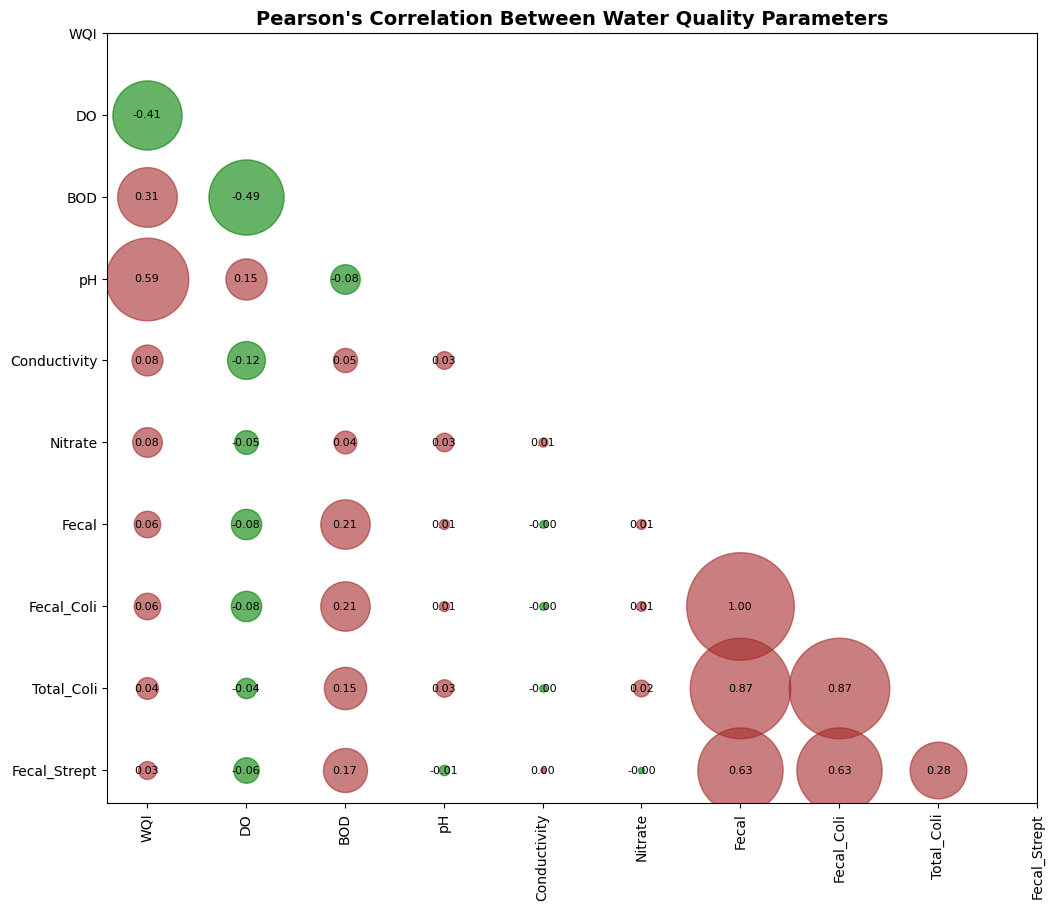

In [ ]:

mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(12,10))
for i, row in enumerate(corr.columns):
    for j, col in enumerate(corr.columns):
        if not mask[i, j]:
            r = corr.iloc[i, j]
            size = abs(r) * 6000
            color = 'brown' if r > 0 else 'green'
            ax.scatter(j, i, s=size, color=color, alpha=0.6)
            ax.text(j, i, f"{r:.2f}", ha='center', va='center', color='black', fontsize=8)

ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
plt.title("Pearson's Correlation Between Water Quality Parameters", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.show()


feature engineering

In [ ]:
# Drop the redundant 'Fecal' column (perfectly correlated with Fecal_Coli)
df_clean.drop(columns=['Fecal'], inplace=True, errors='ignore')

In [ ]:
feature_cols = ['DO', 'BOD', 'pH', 'Conductivity', 'Nitrate', 'Fecal_Coli', 'Total_Coli', 'Fecal_Strept']
# X is the feature matrix, y is the target
X = df_clean[feature_cols].copy()
y = df_clean['Water_Quality']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
K_optimal = np.where(cumulative_variance >= 0.90)[0][0] + 1

In [ ]:
pca_final = PCA(n_components=K_optimal)
X_pca = pca_final.fit_transform(X_scaled)

print(f"PCA reduced features from {len(feature_cols)} to {K_optimal} Principal Components (capturing >90% variance).")


PCA reduced features from 8 to 6 Principal Components (capturing >90% variance).


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and assess accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Model Accuracy using {K_optimal} PCA Features: {accuracy:.4f}")
print("This accuracy validates your feature selection via PCA.")


Classification Model Accuracy using 6 PCA Features: 0.8201
This accuracy validates your feature selection via PCA.


In [ ]:

# X_train0, X_test0, y_train0, y_test0 = train_test_split(X_scaled, y, test_size=0.3, random_state=44)
# model0 = RandomForestClassifier(random_state=44)
# model0.fit(X_train0, y_train0)
# print("Accuracy without PCA:", accuracy_score(y_test0, model0.predict(X_test0)))
# RandomForest performed better without PCA (accuracy ≈ 0.95), suggesting that PCA wasn’t necessary for this dataset.


classification model

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=44)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

Random forest

In [ ]:
model = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=44)
scores = cross_val_score(model, X_scaled, y, cv=5, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print("Cross-Validation Mean Accuracy:", round(scores.mean(), 4))

print("Test Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Weighted F1 Score:", round(f1_score(y_test, y_pred, average='weighted'), 4))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Cross-Validation Mean Accuracy: 0.9221
Test Accuracy: 0.9435
Weighted F1 Score: 0.9377

Classification Report:
               precision    recall  f1-score   support

   Excellent       1.00      0.80      0.89         5
        Good       0.80      0.36      0.50        22
        Poor       0.94      0.97      0.95       284
   Very Poor       0.95      0.98      0.97       167

    accuracy                           0.94       478
   macro avg       0.92      0.78      0.83       478
weighted avg       0.94      0.94      0.94       478



K-Nearest Neighbors

In [ ]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train)
print("Best KNN params:", grid_knn.best_params_)
print("Best Accuracy:", grid_knn.best_score_)

Best KNN params: {'n_neighbors': 9, 'weights': 'distance'}
Best Accuracy: 0.8464832545550035


In [ ]:
best_knn = grid_knn.best_estimator_
y_predi = best_knn.predict(X_test_scaled)


Test Accuracy: 0.8347
Weighted F1 Score: 0.8321

Classification Report:
               precision    recall  f1-score   support

   Excellent       1.00      0.80      0.89         5
        Good       0.73      0.50      0.59        22
        Poor       0.84      0.89      0.87       284
   Very Poor       0.83      0.78      0.80       167

    accuracy                           0.83       478
   macro avg       0.85      0.74      0.79       478
weighted avg       0.83      0.83      0.83       478



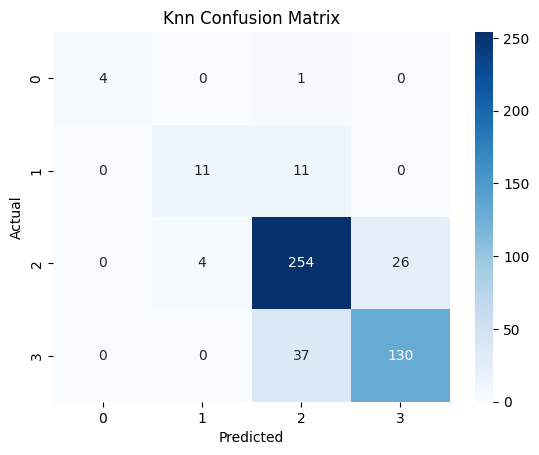

In [ ]:
print("\nTest Accuracy:", round(accuracy_score(y_test, y_predi), 4))
print("Weighted F1 Score:", round(f1_score(y_test, y_predi, average='weighted'), 4))
print("\nClassification Report:\n", classification_report(y_test, y_predi))

cm = confusion_matrix(y_test, y_predi)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("Knn Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVM

In [ ]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf']
}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(X_scaled, y)
print("Best SVM params:", grid_svm.best_params_)
print("Best Accuracy:", grid_svm.best_score_)

Best SVM params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy: 0.8875810808146527


In [ ]:
best_svm = grid_svm.best_estimator_
y_pred = best_svm.predict(X_test)


Test Accuracy: 0.9268
Weighted F1 Score: 0.9192

Classification Report:
               precision    recall  f1-score   support

   Excellent       1.00      0.80      0.89         5
        Good       0.67      0.27      0.39        22
        Poor       0.91      0.98      0.94       284
   Very Poor       0.97      0.93      0.95       167

    accuracy                           0.93       478
   macro avg       0.89      0.74      0.79       478
weighted avg       0.92      0.93      0.92       478



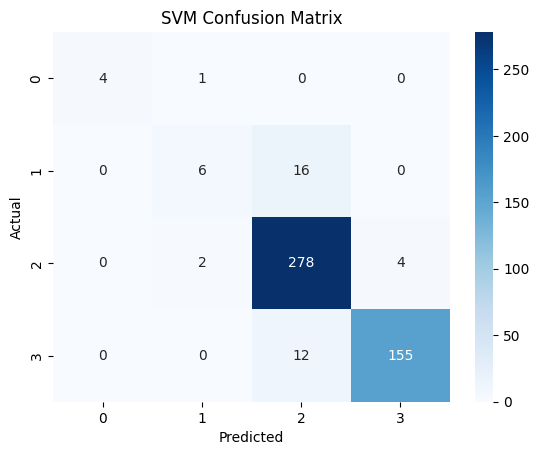

In [ ]:
print("\nTest Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Weighted F1 Score:", round(f1_score(y_test, y_pred, average='weighted'), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ANN

In [ ]:
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)


In [ ]:
#Ann model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(y_train_cat.shape[1], activation='softmax')  #
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Test Accuracy: 0.3515
Weighted F1 Score: 0.2025

Classification Report:
               precision    recall  f1-score   support

   Excellent       0.00      0.00      0.00         5
        Good       0.16      0.50      0.24        22
        Poor       0.00      0.00      0.00       284
   Very Poor       0.39      0.94      0.55       167

    accuracy                           0.35       478
   macro avg       0.14      0.36      0.20       478
weighted avg       0.14      0.35      0.20       478



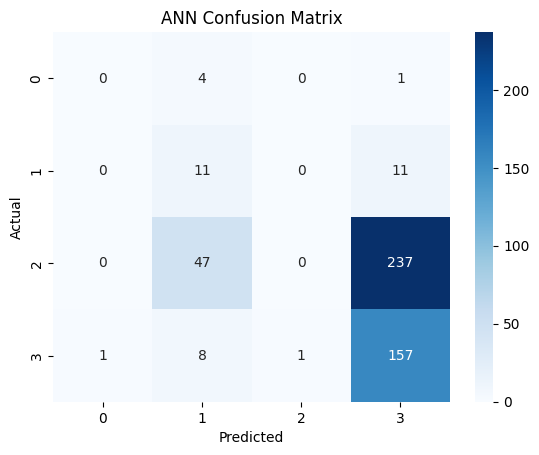

In [ ]:

print("Test Accuracy:", round(accuracy_score(y_test_enc, y_pred), 4))
print("Weighted F1 Score:", round(f1_score(y_test_enc, y_pred, average='weighted'), 4))
print("\nClassification Report:\n", classification_report(y_test_enc, y_pred, target_names=le.classes_))

#  Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title("ANN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

XG Boost

In [ ]:
le = LabelEncoder()
y_enc = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_enc, test_size=0.2, random_state=42, stratify=y_enc
)

In [ ]:
clf = XGBClassifier(
     objective="multi:softprob",
     num_class=len(np.unique(y_enc)),
     eval_metric="mlogloss",
     use_label_encoder=False
)

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=XGBClassifier(random_state=44, n_jobs=-1),
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

In [ ]:
grid.fit(X_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best accuracy:", grid.best_score_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 500, 'subsample': 0.7}
Best accuracy: 0.9709186351706036


In [ ]:
y_pred_int = grid.predict(X_test)

In [ ]:
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred_int)


              precision    recall  f1-score   support

   Excellent      1.000     1.000     1.000         3
        Good      0.846     0.733     0.786        15
        Poor      0.973     0.973     0.973       186
   Very Poor      0.974     0.991     0.983       115

    accuracy                          0.969       319
   macro avg      0.948     0.924     0.935       319
weighted avg      0.968     0.969     0.968       319



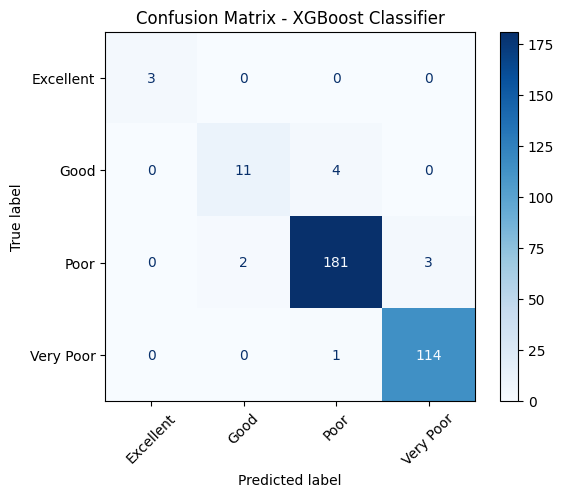

In [ ]:
print(classification_report(y_test_labels, y_pred_labels, digits=3))
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()


Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

In [ ]:
param_grid_gb = {
    "n_estimators": [100, 300],
    "learning_rate": [0.05, 0.1],
    "max_depth": [2, 3],
    "subsample": [1.0, 0.8],
    "max_features": ["sqrt", None],
}


In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_gb = GridSearchCV(
    gb,
    param_grid_gb,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=1,
    error_score="raise"
)


In [ ]:
grid_gb.fit(X_train, y_train)

print("Best params (GB):", grid_gb.best_params_)
print(f"Best CV accuracy (GB): {grid_gb.best_score_:.3f}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best params (GB): {'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'n_estimators': 100, 'subsample': 0.8}
Best CV accuracy (GB): 0.969


In [ ]:
y_pred_gb_int = grid_gb.predict(X_test)
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred_gb_int)


In [ ]:
test_acc = (y_pred_gb_int == y_test).mean()
print(f"Test Accuracy (GB): {test_acc:.3f}")

Test Accuracy (GB): 0.966



===== Classification Report (GradientBoostingClassifier) =====
              precision    recall  f1-score   support

   Excellent      1.000     1.000     1.000         3
        Good      0.909     0.667     0.769        15
        Poor      0.968     0.973     0.971       186
   Very Poor      0.966     0.991     0.979       115

    accuracy                          0.966       319
   macro avg      0.961     0.908     0.930       319
weighted avg      0.965     0.966     0.964       319



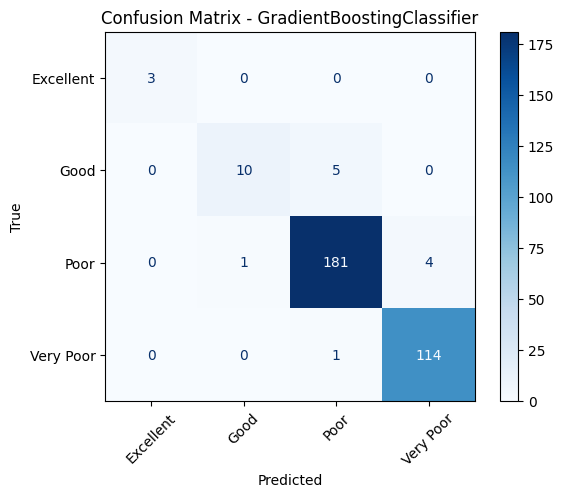

In [ ]:
print("\n===== Classification Report (GradientBoostingClassifier) =====")
print(classification_report(y_test_labels, y_pred_labels, digits=3))

# --- Confusion Matrix ---
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - GradientBoostingClassifier")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

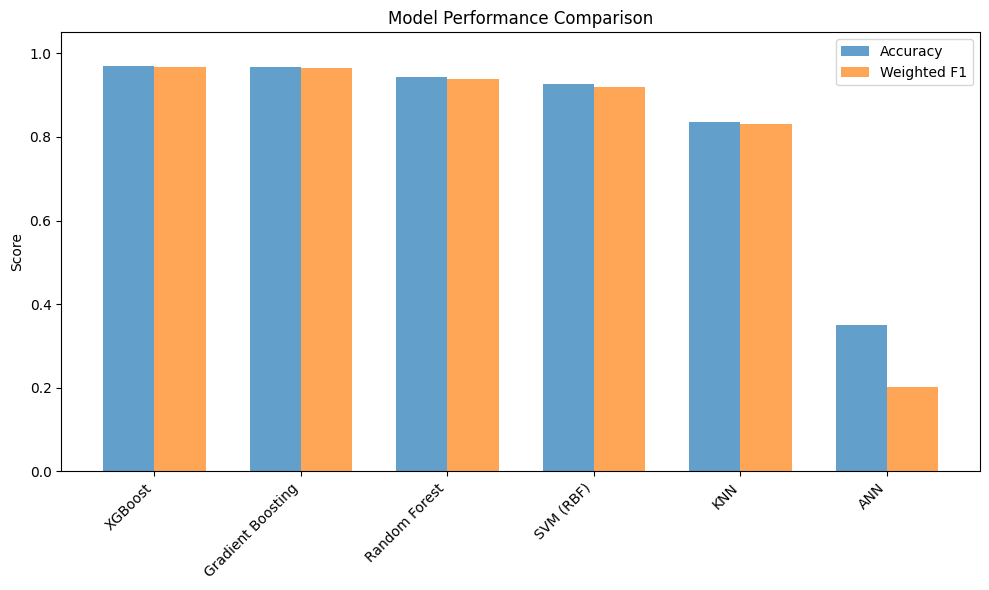

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': [
        'XGBoost',
        'Gradient Boosting',
        'Random Forest',
        'SVM (RBF)',
        'KNN',
        'ANN'
    ],
    'Accuracy': [0.969, 0.966, 0.943, 0.927, 0.835, 0.351],
    'Weighted F1': [0.968, 0.964, 0.938, 0.919, 0.832, 0.203]
}

df = pd.DataFrame(data)
df = df.sort_values(by='Accuracy', ascending=False)

plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(df))

plt.bar(x, df['Accuracy'], width=bar_width, label='Accuracy', alpha=0.7)
plt.bar([p + bar_width for p in x], df['Weighted F1'], width=bar_width, label='Weighted F1', alpha=0.7)

plt.xticks([p + bar_width/2 for p in x], df['Model'], rotation=45, ha='right')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.ylim(0, 1.05)
plt.legend()
plt.tight_layout()
plt.show()

Regression


In [ ]:
# y is now BOD (our regression target)
y = df_clean['BOD']   # <-- target variable
X = X_pca       # PCA features already created from other columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluation Metrics
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
r2_ridge = r2_score(y_test, y_pred_ridge)


In [ ]:

print("===== Ridge Regression (BOD Prediction) =====")
print(f"RMSE: {rmse_ridge:.4f}")
print(f"R²: {r2_ridge:.4f}")


===== Ridge Regression (BOD Prediction) =====
RMSE: 6.1002
R²: 0.7491


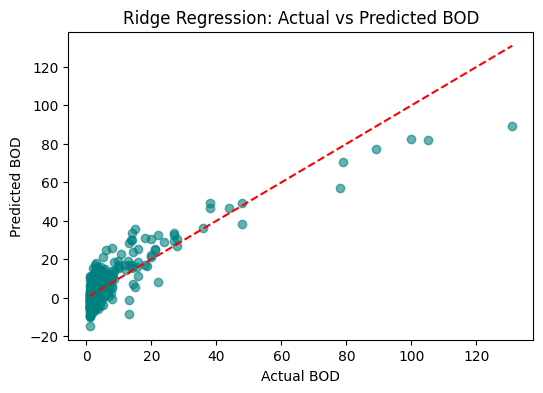

In [ ]:

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual BOD")
plt.ylabel("Predicted BOD")
plt.title("Ridge Regression: Actual vs Predicted BOD")
plt.show()